In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Step 1: Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Step 2: Load the Dataset
dataset = pd.read_csv('/content/drive/MyDrive/MalwareDataset.csv')

In [7]:
# Step 3: Display the First Few Rows
print("First 5 Rows of the Dataset:")
dataset.head()

First 5 Rows of the Dataset:


,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1


In [8]:
# Step 4: Understand the Columns and Identify the Target
print("\nDataset Information:")
dataset.info()  # Gives an overview of columns and data types
print("\nUnique values in the 'legitimate' column:")
dataset['legitimate'].value_counts()  # Confirm the target column distribution


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137444 entries, 0 to 137443
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   AddressOfEntryPoint          137444 non-null  int64
 1   MajorLinkerVersion           137444 non-null  int64
 2   MajorImageVersion            137444 non-null  int64
 3   MajorOperatingSystemVersion  137444 non-null  int64
 4   DllCharacteristics           137444 non-null  int64
 5   SizeOfStackReserve           137444 non-null  int64
 6   NumberOfSections             137444 non-null  int64
 7   ResourceSize                 137444 non-null  int64
 8   legitimate                   137444 non-null  int64
dtypes: int64(9)
memory usage: 9.4 MB

Unique values in the 'legitimate' column:


,count
legitimate,
0,96526
1,40918


In [9]:
# Step 5: Descriptive Statistics
print("\nDescriptive Statistics:")
dataset.describe()


Descriptive Statistics:


,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
count,1.374440e+05,137444.000000,137444.000000,137444.000000,137444.000000,1.374440e+05,137444.000000,1.374440e+05,137444.000000
mean,1.722186e+05,8.620784,68.731876,5.098738,22301.043436,9.306841e+05,4.997119,2.474766e+05,0.297707
std,3.438014e+06,4.095635,1185.709873,99.437584,15444.753219,5.553175e+05,1.917237,2.129516e+07,0.457252
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,1.272100e+04,8.000000,0.000000,4.000000,320.000000,1.048576e+06,4.000000,2.216000e+03,0.000000
50%,5.300800e+04,9.000000,0.000000,5.000000,33088.000000,1.048576e+06,5.000000,9.640000e+03,0.000000
75%,6.157800e+04,10.000000,6.000000,5.000000,33088.000000,1.048576e+06,5.000000,2.376250e+04,1.000000
max,1.074484e+09,255.000000,28619.000000,36868.000000,49504.000000,3.355443e+07,40.000000,4.294903e+09,1.000000


In [10]:
# Step 6: Check for Missing Values
print("\nMissing Values in Each Column:")
dataset.isnull().sum()


Missing Values in Each Column:


,0
AddressOfEntryPoint,0
MajorLinkerVersion,0
MajorImageVersion,0
MajorOperatingSystemVersion,0
DllCharacteristics,0
SizeOfStackReserve,0
NumberOfSections,0
ResourceSize,0
legitimate,0


In [11]:
# Step 1: Split the dataset into features (X) and target (y)
df_shuffled = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
X = dataset.drop(columns=['legitimate'])  # Features
y = dataset['legitimate']  # Target

In [12]:
# Step 2: Divide the data into training (80%) and testing (20%) sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Step 3: Standardize the numerical data
scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [14]:
import pickle

# Save the fitted scaler to a specific folder within your Drive
with open("/content/drive/My Drive/scaler.pkl", "wb") as file:  # Changed the path
    pickle.dump(scaler, file)

print("Scaler saved as scaler.pkl in My Drive")

Scaler saved as scaler.pkl in My Drive


In [15]:
# Verify scaling (mean ~0 and std ~1 for training data)
print("\nFirst 5 rows of standardized training data:")
print(xTrainScaled[:5])

print("\nFeature means (training set):", xTrainScaled.mean(axis=0))
print("Feature standard deviations (training set):", xTrainScaled.std(axis=0))


First 5 rows of standardized training data:
[[-3.96330267e-02  5.60448982e-01 -5.77508438e-02 -1.47553480e-03
   6.98777598e-01  2.14132343e-01 -1.04240747e+00  1.32093737e-02]
 [-3.30981899e-02 -1.56001329e+00 -5.26696332e-02 -1.04705134e-02
   6.78063304e-01  2.14132343e-01  1.56744452e+00 -1.09426786e-02]
 [-5.05134816e-03 -1.46371776e-01 -5.77508438e-02 -1.04705134e-02
  -1.35608042e+00  2.14132343e-01 -1.04240747e+00 -1.09978509e-02]
 [-4.22390771e-02  3.24842062e-01 -5.26696332e-02 -1.47553480e-03
   7.65063341e-01  2.14132343e-01  5.23503720e-01 -7.97498777e-03]
 [-2.82469309e-02  5.60448982e-01 -5.77508438e-02 -1.47553480e-03
   6.94634739e-01  2.14132343e-01 -5.20437076e-01 -1.08729872e-02]]

Feature means (training set): [ 2.26174305e-18  3.78357302e-17 -3.21813726e-17 -2.11634529e-18
 -9.07928283e-18 -2.57192496e-17  1.57998908e-16 -6.46212301e-19]
Feature standard deviations (training set): [1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Define the Random Forest model
rfModel = RandomForestClassifier(random_state=42)

# Optimized hyperparameter grid (smaller range)
paramDist = {
    'n_estimators': [np.int64(400)],  # Reduce range (100 to 500)
    'max_depth': [20],  # Remove unnecessary depths
    'min_samples_split': [5],  # Use only higher values to prevent overfitting
    'min_samples_leaf': [2],  # Reduce options
    'bootstrap': [True],  # Fix bootstrap to True
    'max_features': ['sqrt'],  # Use only 'sqrt' for speed
    'criterion': ['gini']  # Use only 'gini' (entropy is slower)
}

# Setup cross-validation with fewer splits (reducing compute time)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create RandomizedSearchCV with reduced iterations
randomSearch = RandomizedSearchCV(
    estimator=rfModel,
    param_distributions=paramDist,
    n_iter=20,  # Reduce iterations (from 100 to 20)
    scoring='accuracy',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model with optimized hyperparameters
randomSearch.fit(xTrainScaled, yTrain)

# Get the best hyperparameters
bestParams = randomSearch.best_params_
print("Best Hyperparameters:", bestParams)

# Get the best model
bestRfModel = randomSearch.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'n_estimators': np.int64(400), 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}


In [18]:
rfPredictions = bestRfModel.predict(xTestScaled)

In [19]:
# Evaluate the Random Forest model
rfAccuracy = accuracy_score(yTest, rfPredictions)
print(f"\nRandom Forest Accuracy: {rfAccuracy:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(yTest, rfPredictions))


Random Forest Accuracy: 0.9906

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19305
           1       0.98      0.98      0.98      8184

    accuracy                           0.99     27489
   macro avg       0.99      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489



In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Random Forest Confusion Matrix:
[[19171   134]
 [  125  8059]]


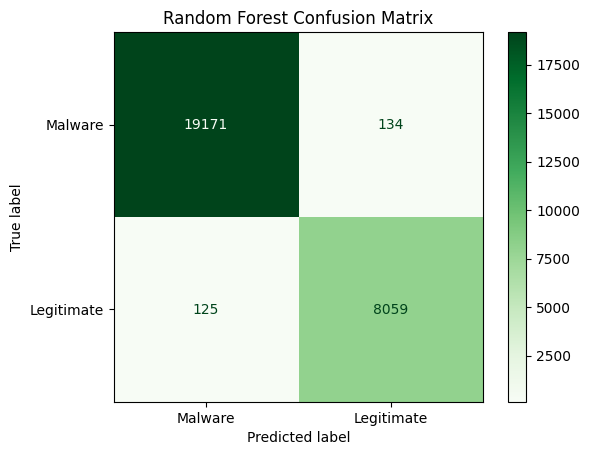

In [21]:
# Random Forest Confusion Matrix
rfCm = confusion_matrix(yTest, rfPredictions)
print("\nRandom Forest Confusion Matrix:")
print(rfCm)
ConfusionMatrixDisplay(confusion_matrix=rfCm, display_labels=['Malware', 'Legitimate']).plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [22]:
import pickle

with open("/content/drive/My Drive/malware.pkl", "wb") as file:  # Open file in write-binary mode
    pickle.dump(bestRfModel, file)
